### Resume Parser by Regular Expression

In [23]:
import regex as re

In [ ]:
!pip install pdfminer.six

In [ ]:
!pip install docx2txt

In [ ]:
!pip install nlp

**Extracting Text from PDF**

In [28]:
import pdfminer
from io import StringIO
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage
import docx2txt
import os

In [ ]:
rootdir = '/content/drive/MyDrive/DataForMasterProject/ActualDataFolder/RegExData'
files = os.listdir(rootdir)
file_names = []
for file in os.listdir(rootdir):
    file_names.append(os.path.join(rootdir, file))
file_names

In [10]:
def open_pdf_file(file_name):
    output = StringIO()
    manager = PDFResourceManager()
    converter = TextConverter(manager, output, laparams=LAParams())
    interpreter = PDFPageInterpreter(manager, converter)

    pagenums = set()
    infile = open(file_name, 'rb')
    for page in PDFPage.get_pages(infile, pagenums):
        interpreter.process_page(page)
    infile.close()
    converter.close()
    text = output.getvalue()
    output.close()

    result = []

    for line in text.split('\n'):
        line2 = line.strip()
        if line2 != '':
            result.append(line2)
    return (result)

In [30]:
def open_docx_file(file_name):
    temp = docx2txt.process(file_names[0])
    text = [line.replace('\t', ' ') for line in temp.split('\n') if line]
    text = [t for t in text if len(t) > 1]
    return (text)

In [31]:
def remove_punctuations(line):
    return re.sub(r'(\.|\,)', '', line)

def preprocess_document(document):
    for index, line in enumerate(document):
        line = line.lower()
        line = remove_punctuations(line)

        line = line.split(' ')
        while '' in line:
            line.remove('')

        while ' '  in line:
            line.remove(' ')


        document[index] = ' '.join(line)
    return (document)

In [32]:
#Name
import spacy
from spacy.matcher import Matcher

# load pre-trained model
nlp = spacy.load('en_core_web_sm')

# initialize matcher with a vocab
matcher = Matcher(nlp.vocab)

def extract_name(resume_text):
    nlp_text = nlp(resume_text)

    # First name and Last name are always Proper Nouns
    pattern = [{'POS': 'PROPN'}, {'POS': 'PROPN'}]

    matcher.add('NAME', [pattern], on_match = None)

    matches = matcher(nlp_text)

    for match_id, start, end in matches:
        span = nlp_text[start:end]
        return span.text


#name = extract_name(text)
#print(name)
#extracted_text["Name"] = name

In [33]:
def get_email(document):
    #Further optimization to be done.
    emails = []
    pattern = re.compile(r'\w+@[a-zA-Z_]+?\.[a-zA-Z]{2,3}')
    for line in document:
        matches = pattern.findall(line)
        for mat in matches:
            if len(mat) > 0:
                emails.append(mat)
    #print (emails)
    return (emails)

In [34]:
def get_phone_no(document):
    #This function has to be further modified better and accurate results.
    #Possible phone number formats - Including +91 or just with the numbers.

    mob_num_regex = r'''(\d{3}[-\.\s]??\d{3}[-\.\s]??\d{4}|\(\d{3}\)
                        [-\.\s]*\d{3}[-\.\s]??\d{4}|\d{5}[-\.\s]??\d{4})'''
    pattern = re.compile(mob_num_regex)
    matches = []
    for line in document:
        match = pattern.findall(line)
        for mat in match:
            if len(mat) > 9:
                matches.append(mat)

    return (matches)

In [35]:
EDU_PATH='/content/drive/MyDrive/DataForMasterProject/ActualDataFolder/education.txt'
def get_education(document):
    education_terms = []
    with open(EDU_PATH, 'r') as file:
        education_terms = file.readlines()

    education_terms = [term.strip('\n') for term in education_terms]
    education = []
    for line in document:
        for word in line.split(' '):
            if len(word) > 2 and word in education_terms:
                if line not in education:
                    education.append(line)
    #print (education)
    return (education)

In [36]:
SKILL_PATH='/content/drive/MyDrive/DataForMasterProject/ActualDataFolder/skills.txt'
def get_skills(document):
    skill_terms = []
    with open(SKILL_PATH, 'r') as file:
        skill_terms = file.readlines()

    skill_terms = [term.strip('\n') for term in skill_terms]
    skills = []

    for line in document:
        words = line.split(' ')

        for word in words:
            if word in skill_terms:
                if word not in skills:
                    skills.append(word)

        word_pairs = []
        for i in zip(words[:-1], words[1:]):
            word_pairs.append(i[0] + ' ' + i[1])   #This is to find skills like 'data science' i.e skills containint two words.    return (skills)

        for pair in word_pairs:
            if pair in skill_terms:
                if pair not in skills:
                    skills.append(pair)

    return (skills)

In [37]:
def get_experience(document):
    pattern1 = re.compile(r'(jan(uary)?|feb(ruary)?|mar(ch)?|apr(il)?|may|jun(e)?|jul(y)?|aug(ust)?|sep(tember)?|oct(ober)?|nov(ember)?|dec(ember)?)(\s|\S)(\d{2,4}).*(jan(uary)?|feb(ruary)?|mar(ch)?|apr(il)?|may|jun(e)?|jul(y)?|aug(ust)?|sep(tember)?|oct(ober)?|nov(ember)?|dec(ember)?)(\s|\S)(\d{2,4})')
    pattern2 = re.compile(r'(\d{2}(.|..)\d{4}).{1,4}(\d{2}(.|..)\d{4})')
    pattern3 = re.compile(r'(\d{2}(.|..)\d{4}).{1,4}(present)')
    pattern4 = re.compile(r'(jan(uary)?|feb(ruary)?|mar(ch)?|apr(il)?|may|jun(e)?|jul(y)?|aug(ust)?|sep(tember)?|oct(ober)?|nov(ember)?|dec(ember)?)(\s|\S)(\d{2,4}).*(present)')
    patterns = [pattern1, pattern2, pattern3, pattern4]
    experience = []
    for index, line in enumerate(document):
        for pattern in patterns:
            exp = pattern.findall(line)
            if len(exp) > 0:
                experience.append(document[index:index+4])

    return (experience)

In [38]:
file_name='/content/drive/MyDrive/DataForMasterProject/ActualDataFolder/RegExData/resume1.pdf'
document = open_pdf_file(file_name)

print(document)

['SURYAKIRAN KASTURI', 'Contact: +91-9448821250/+916362463338 Email: kirankss@gmail.com; Date of Birth: 28th Dec 1975', 'Product Development Leader ~ Full stack ~ Process Automation', 'Offering prolific experience in the domain of software designing, testing, implementation and support; seeking senior level', 'assignments across the industry, while bringing the following deliverables:', 'Strategic Planning ~ Performance Improvement ~ Full Product Lifecycle ~ Cloud ~ Analytics', '~ Diverse Technologies ~ Mobile Apps ~ Mentoring and coaching teams ~ CI/CD ~ TDD', '\uf0fc  Presenter at eXtreme Programming Conference, India 2015 on TDD in embedded environment', '\uf0fc  Member of the Core Agile team at IDC and organizer of the first Agile Day at Intuit', '\uf0fc  Member of the innovation council and have organized innovation events at Allstate', 'Career Precis', '\uf0fc  Product Development Leader with experience in leading teams while being an IC during design and development', '\uf0fc  E

In [47]:
name_list =[]
email_ids = []
phone_nos = []
education_1 = []
education_2 = []
skills_1 = []
skills_2 = []
experience_1 = []
experience_2 = []

for file_name in file_names:
    if file_name.endswith('.pdf'):
        document = open_pdf_file(file_name)
    elif file_name.endswith('.docx'):
        document = open_docx_file(file_name)

    my_string = ' '.join(document)
    name = extract_name(my_string)
    print(name)
    if len(name) > 0:
        name_list.append(name)
    else:
        name_list.append('')


    email = get_email(document)
    phone_no = get_phone_no(document)
    document = preprocess_document(document)
    #print ('\n\n')
    #print (file_name)
    #print ('Email is {} phone number is {}'.format(email, phone_no))
    if len(email) > 0:
        email_ids.append(email[0])
    else:
        email_ids.append('')

    if len(phone_no) > 0:
        phone_nos.append(phone_no[0])
    else:
        phone_nos.append('')

    education = get_education(document)
    #print ('Education ', get_education(document))
    if len(education) > 1:
        education_1.append(education[0])
        education_2.append(education[1])
    elif len(education) == 1:
        education_1.append(education[0])
        education_2.append('')
    elif len(education) == 0:
        education_1.append('')
        education_2.append('')

    skills = get_skills(document)
    #print ('Skills ', skills)

    if len(skills) > 1:
        skills_1.append(skills[0])
        skills_2.append(skills[1])
    elif len(skills) == 1:
        skills_1.append(skills[0])
        skills_2.append('')
    elif len(skills) == 0:
        skills_1.append('')
        skills_2.append('')

    experience = get_experience(document)
    #print ('Experience ', get_experience(document))
    if len(experience) > 1:
        experience_1.append(experience[0])
        experience_2.append(experience[1])
    elif len(experience) == 1:
        experience_1.append(experience[0])
        experience_2.append('')
    elif len(experience) == 0:
        experience_1.append('')
        experience_2.append('')

SURYAKIRAN KASTURI
MONICA MEYER
McAllister St
Sébastien Genty
Brendan Herger
John Smith
john smith


In [48]:
import pandas as pd
df = pd.DataFrame({'Name':name_list,'email id':email_ids, 'phone nos':phone_nos, 'education 1':education_1, 'education 2':education_2, 'skills 1':skills_1,
              'skills 2':skills_2, 'experience 1':experience_1, 'experiece 2':experience_2})

In [49]:
!pip install openpyxl

In [50]:
PATH_SAVE='/content/drive/MyDrive/DataForMasterProject/ActualDataFolder/Resume_extracted_data.xlsx'
#df.to_excel(PATH_SAVE)

In [51]:
try:
    df.to_excel(PATH_SAVE)
    print("File saved successfully.")
except Exception as e:
    print("Error occurred while saving the file:", str(e))

File saved successfully.


**Extracting Information with SpaCy’s**

In [ ]:
!pip install spacy

In [ ]:
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 50.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.1
    Uninstalling numpy-1.25.1:
      Successfully uninstalled numpy-1.25.1


In [ ]:
!python -m spacy download en_core_web_sm

2023-07-14 05:51:40.867904: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 69.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
!pip install pdfminer.six

In [ ]:
rootdir = '/content/drive/MyDrive/DataForMasterProject/ActualDataFolder/RegExData'

In [ ]:
import re
from pdfminer.high_level import extract_text
import spacy
from spacy.matcher import Matcher

In [ ]:
def extract_text_from_pdf(pdf_path):
    return extract_text(pdf_path)

In [ ]:
def extract_contact_number_from_resume(text):
    contact_number = None

    # Use regex pattern to find a potential contact number
    pattern = r"\b(?:\+?\d{1,3}[-.\s]?)?\(?\d{3}\)?[-.\s]?\d{3}[-.\s]?\d{4}\b"
    match = re.search(pattern, text)
    if match:
        contact_number = match.group()

    return contact_number

In [ ]:
def extract_email_from_resume(text):
    email = None

    # Use regex pattern to find a potential email address
    pattern = r"\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,}\b"
    match = re.search(pattern, text)
    if match:
        email = match.group()

    return email

In [ ]:
def extract_skills_from_resume(text, skills_list):
    skills = []

    for skill in skills_list:
        pattern = r"\b{}\b".format(re.escape(skill))
        match = re.search(pattern, text, re.IGNORECASE)
        if match:
            skills.append(skill)

    return skills

In [ ]:
def extract_education_from_resume(text):
    education = []

    # Use regex pattern to find education information
    pattern = r"(?i)(?:Bsc|\bB\.\w+|\bM\.\w+|\bPh\.D\.\w+|\bBachelor(?:'s)?|\bMaster(?:'s)?|\bPh\.D)\s(?:\w+\s)*\w+"
    matches = re.findall(pattern, text)
    for match in matches:
        education.append(match.strip())

    return education

In [ ]:
def extract_name(resume_text):
    nlp = spacy.load('en_core_web_sm')
    matcher = Matcher(nlp.vocab)

    # Define name patterns
    patterns = [
        [{'POS': 'PROPN'}, {'POS': 'PROPN'}],  # First name and Last name
        [{'POS': 'PROPN'}, {'POS': 'PROPN'}, {'POS': 'PROPN'}],  # First name, Middle name, and Last name
        [{'POS': 'PROPN'}, {'POS': 'PROPN'}, {'POS': 'PROPN'}, {'POS': 'PROPN'}]  # First name, Middle name, Middle name, and Last name
        # Add more patterns as needed
    ]

    for pattern in patterns:
        matcher.add('NAME', patterns=[pattern])

    doc = nlp(resume_text)
    matches = matcher(doc)

    for match_id, start, end in matches:
        span = doc[start:end]
        return span.text

    return None

In [ ]:
if __name__ == '__main__':
    resume_paths = [r"/content/drive/MyDrive/DataForMasterProject/ActualDataFolder/RegExData/resume1.pdf"]

    for resume_path in resume_paths:
        text = extract_text_from_pdf(resume_path)

        print("Resume:", resume_path)

        #name = extract_name(text)
        if name:
            print("Name:", name)
        else:
            print("Name not found")

        contact_number = extract_contact_number_from_resume(text)
        if contact_number:
            print("Contact Number:", contact_number)
        else:
            print("Contact Number not found")

        email = extract_email_from_resume(text)
        if email:
            print("Email:", email)
        else:
            print("Email not found")

        skills_list = ['Python', 'Data Analysis', 'Machine Learning', 'Communication', 'Project Management', 'Deep Learning', 'SQL', 'Tableau']
        extracted_skills = extract_skills_from_resume(text, skills_list)
        if extracted_skills:
            print("Skills:", extracted_skills)
        else:
            print("No skills found")

        extracted_education = extract_education_from_resume(text)
        if extracted_education:
            print("Education:", extracted_education)
        else:
            print("No education information found")

        print()


Resume: /content/drive/MyDrive/DataForMasterProject/ActualDataFolder/RegExData/resume1.pdf
Name not found
Contact Number: 91-9448821250
Email: kirankss@gmail.com
Skills: ['Communication', 'SQL']
Education: ['Bachelor of Engineering']



**Named Entity Recognition (NER)**

A named entity is basically a real-life object which has proper identification and can be denoted with a proper name. Named Entities can be a place, person, organization, time, object, or geographic entity.

**Named Entity Recognition is the process of NLP which deals with identifying and classifying named entities.**

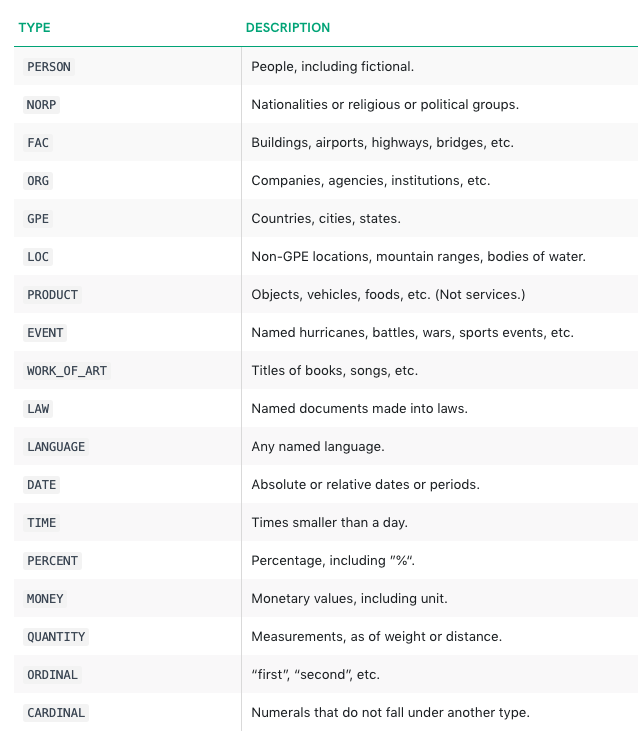

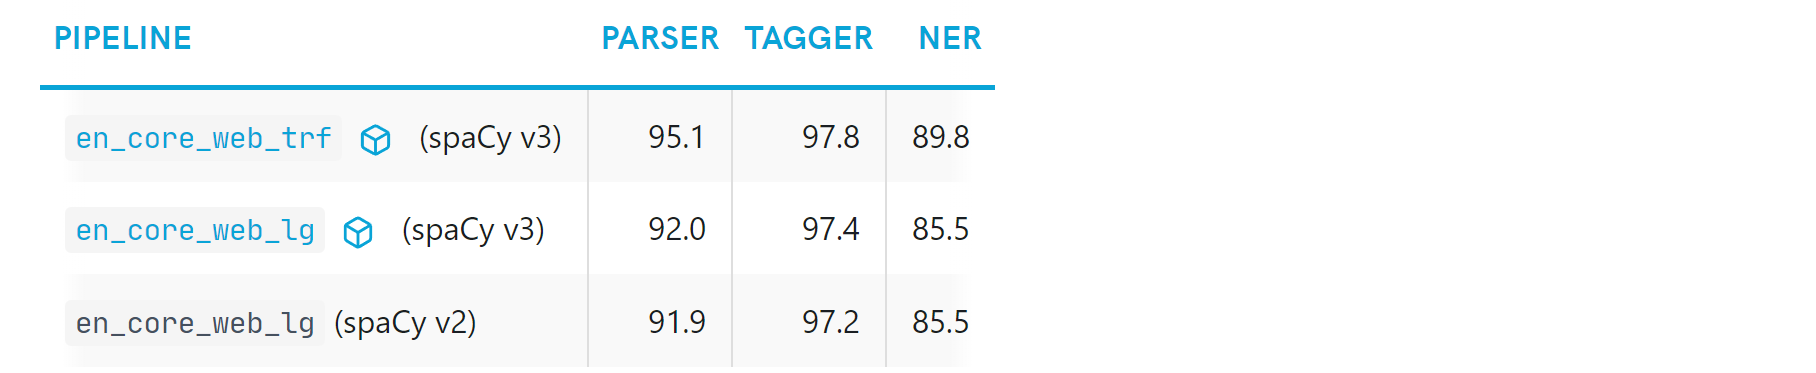

In [ ]:
!pip install -U pip setuptools wheel
#!pip install -U spacy
!pip install spacy
!python -m spacy download en_core_web_sm
!python -m spacy download en_core_web_lg
!pip install lxml
!pip install beautifulsoup4

In [ ]:
import spacy
spacy.__version__

'3.5.4'

In [ ]:
import re
import nltk
import numpy as np
import pandas as pd

In [ ]:
PATH_FOLDER='/content/drive/MyDrive/DataForMasterProject/ResumeDataSet.csv'


In [ ]:
df = pd.read_csv(PATH_FOLDER)

print(df.head())

# drop unused columns
#del df['ID']
#del df['Resume_html']
print(df)

         ID                                         Resume_str  \
0  16852973           HR ADMINISTRATOR/MARKETING ASSOCIATE\...   
1  22323967           HR SPECIALIST, US HR OPERATIONS      ...   
2  33176873           HR DIRECTOR       Summary      Over 2...   
3  27018550           HR SPECIALIST       Summary    Dedica...   
4  17812897           HR MANAGER         Skill Highlights  ...   

                                         Resume_html Category  
0  <div class="fontsize fontface vmargins hmargin...       HR  
1  <div class="fontsize fontface vmargins hmargin...       HR  
2  <div class="fontsize fontface vmargins hmargin...       HR  
3  <div class="fontsize fontface vmargins hmargin...       HR  
4  <div class="fontsize fontface vmargins hmargin...       HR  
            ID                                         Resume_str  \
0     16852973           HR ADMINISTRATOR/MARKETING ASSOCIATE\...   
1     22323967           HR SPECIALIST, US HR OPERATIONS      ...   
2     331768

In [ ]:
specific_Row_Col_Text = df.iloc[2][1]
print(specific_Row_Col_Text)

         HR DIRECTOR       Summary      Over 20 years experience in recruiting,   15 plus years in Human Resources Executive Management,   5 years of HRIS development and maintenance  4 years working in a Healthcare Enviroment        Skills          Recruiting  FMLA/EEO/FLSA   HRIS Development      Benefit Administration  Policy Development  Web Page Development             Accomplishments      Kansas Health Institute -Health Outcomes for the State of Kansas -1999 
Memberships and Accolades: Project Management Institute Member, SHRM, Chamber of Commerce, 1999 Friends University President's Honor Roll, 1997 Friends University Dean's Honor Roll, Student Liaison for Friends University Topeka (member of Mother-To-Mother, member of the Topeka 
Advertising Federation, several production pieces created nominated for ADDY Awards, received recognition for outstanding customer service assistance by the State of Kansas Travel and Tourism Department., ASHHRA, KAHHR, ACM.  Additional Information: 


In [ ]:
!python -m spacy info

2023-07-14 05:56:07.905389: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

============================== Info about spaCy ==============================

spaCy version    3.6.0                         
Location         /usr/local/lib/python3.10/dist-packages/spacy
Platform         Linux-5.15.109+-x86_64-with-glibc2.31
Python version   3.10.12                       
Pipelines        en_core_web_sm (3.6.0), en_core_web_lg (3.6.0)



In [ ]:
!pip install --upgrade pip

In [ ]:
!pip install -U spacy

In [ ]:
!python -m spacy download 'en_core_web_lg' --force

In [ ]:
import spacy

In [ ]:
nlp = spacy.load('en_core_web_lg')

**Resume (CV) Parsing using Spacy 3**

https://spacy.io/

Resume parsing technology converts an unstructured form of resume data into a structured format.
A Resume Parser helps organizations eliminate the error-prone and time-consuming process and improves recruiters' efficiency.

**Transformers for training and Prediction**

In [ ]:
!pip install spacy_transformers
!pip install -U spacy

In [ ]:
import spacy
from spacy.tokens import DocBin
from tqdm import tqdm
import json

In [ ]:
spacy.__version__

'3.6.0'